In [4]:
import numpy as np
from pathlib import Path
import sys
from statannot.statannot import add_stat_annotation

import matplotlib.pyplot as plt
import seaborn as sbn

dir_path = '/home/nnieto/Nico/Harmonization/harmonize_project/3_check_results/'
__file__ = dir_path+'plot_NM.py'
to_append = Path(__file__).resolve().parent.parent.as_posix()
sys.path.append(to_append)

from lib.utils import extract_experiment_data # noqa
from lib.utils import classification_table, get_fold_acc_auc # noqa

# DATASETS: eNKI, 1000brains, CamCAN, AOMIC-ID1000. PRED: RVR, STACK: RF.
# Separed site analysis

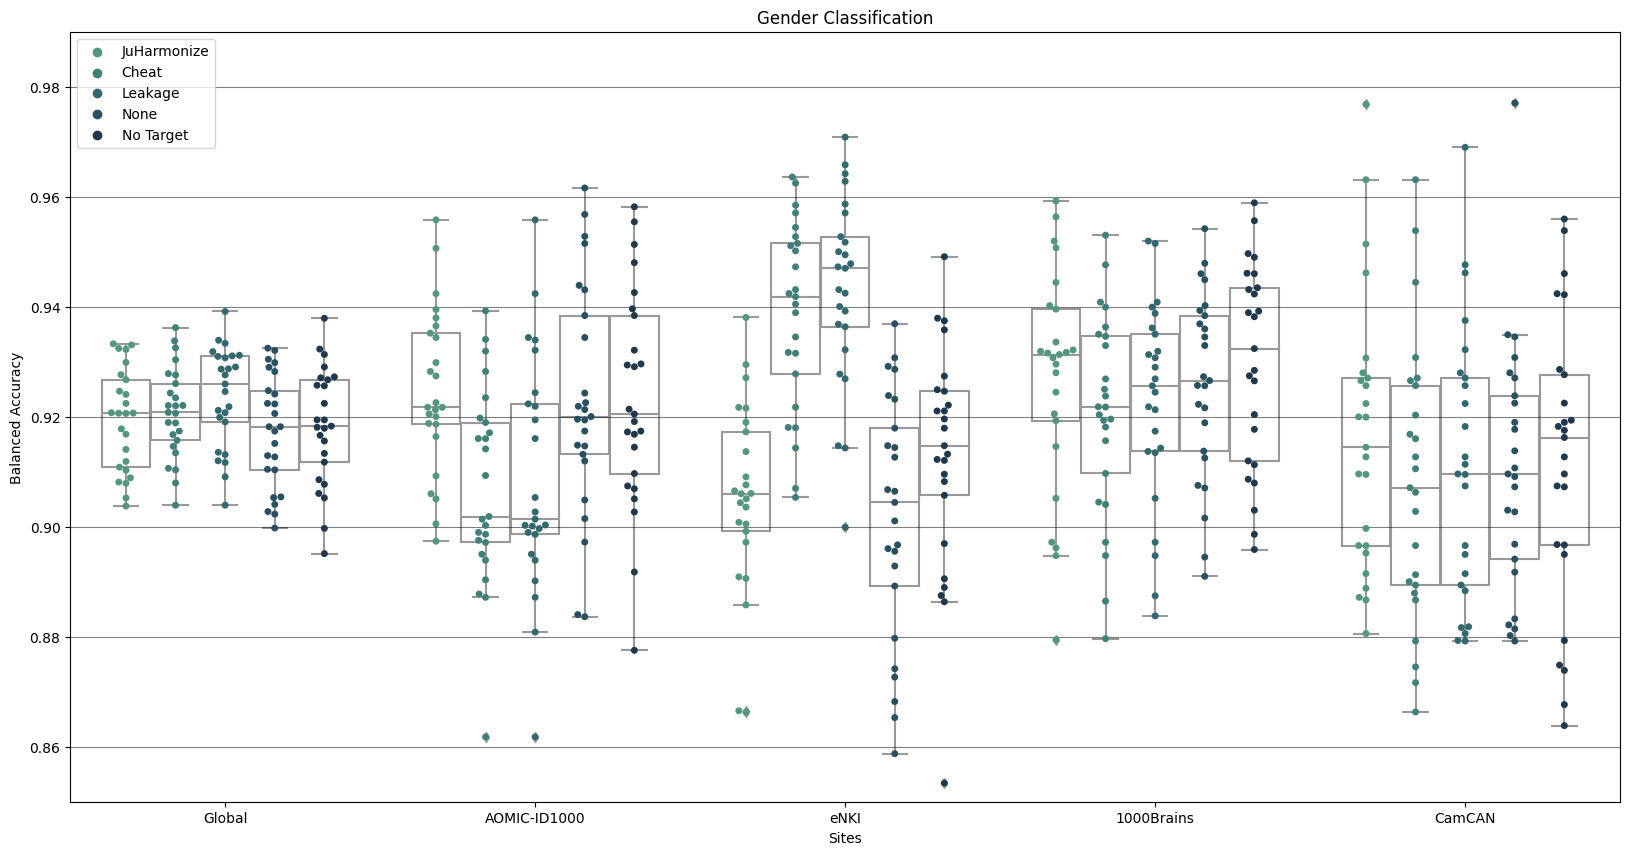

In [2]:
exp_dir = "/home/nnieto/Nico/Harmonization/results_classification/"
experiments_to_check = {
    'test_classification_gender_all_bigs_logit_stack_gssvm_pred_5repetitions'
}
# Get results
data_final = extract_experiment_data(exp_dir, experiments_to_check, False)
data_final.rename(columns={"harmonize_mode": "Harmonization Schemes"},
                  inplace=True)

data_final = get_fold_acc_auc(data_final)

metric_to_plot = "Balanced Accuracy"

# Change to appropiated names
data_final["site"].replace({"1000Gehirne": "1000Brains",
                            "ID1000": "AOMIC-ID1000"}, inplace=True)

data_final["Harmonization Schemes"].replace({"pretend": "JuHarmonize",
                                             "target": "Leakage",
                                             "none": "None",
                                             "cheat": "Cheat",
                                             "notarget": "No Target"},
                                            inplace=True)

# Select methods to plot
harm_modes = ["JuHarmonize", "Cheat", "Leakage", "None", "No Target"]
data_final = data_final[data_final["Harmonization Schemes"].isin(harm_modes)]
site_order = ["Global", "AOMIC-ID1000", "eNKI", "1000Brains", "CamCAN"]
# Plot
fig, ax = plt.subplots(1, 1, figsize=[20, 10])
pal = sbn.cubehelix_palette(5, rot=-.5, light=0.5, dark=0.2)

sbn.swarmplot(
    data=data_final,
    x="site", y=metric_to_plot, hue="Harmonization Schemes",
    order=site_order,
    hue_order=harm_modes, dodge=True, ax=ax,
    palette=pal
)

sbn.boxplot(
    data=data_final, color="w", zorder=1,
    x="site", y=metric_to_plot, hue="Harmonization Schemes",
    order=site_order,
    hue_order=harm_modes, dodge=True, ax=ax, palette=["w"]*len(harm_modes)
)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:len(harm_modes)], labels[:len(harm_modes)])
ax.set_ylim([0.85, 0.99])

plt.ylabel(metric_to_plot)
plt.xlabel("Sites")
plt.title("Gender Classification")
plt.grid(alpha=0.5, axis="y", c="black")
plt.show()



# Balanced Data

/tmp/ipykernel_259542/211648305.py:25: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sbn.swarmplot(


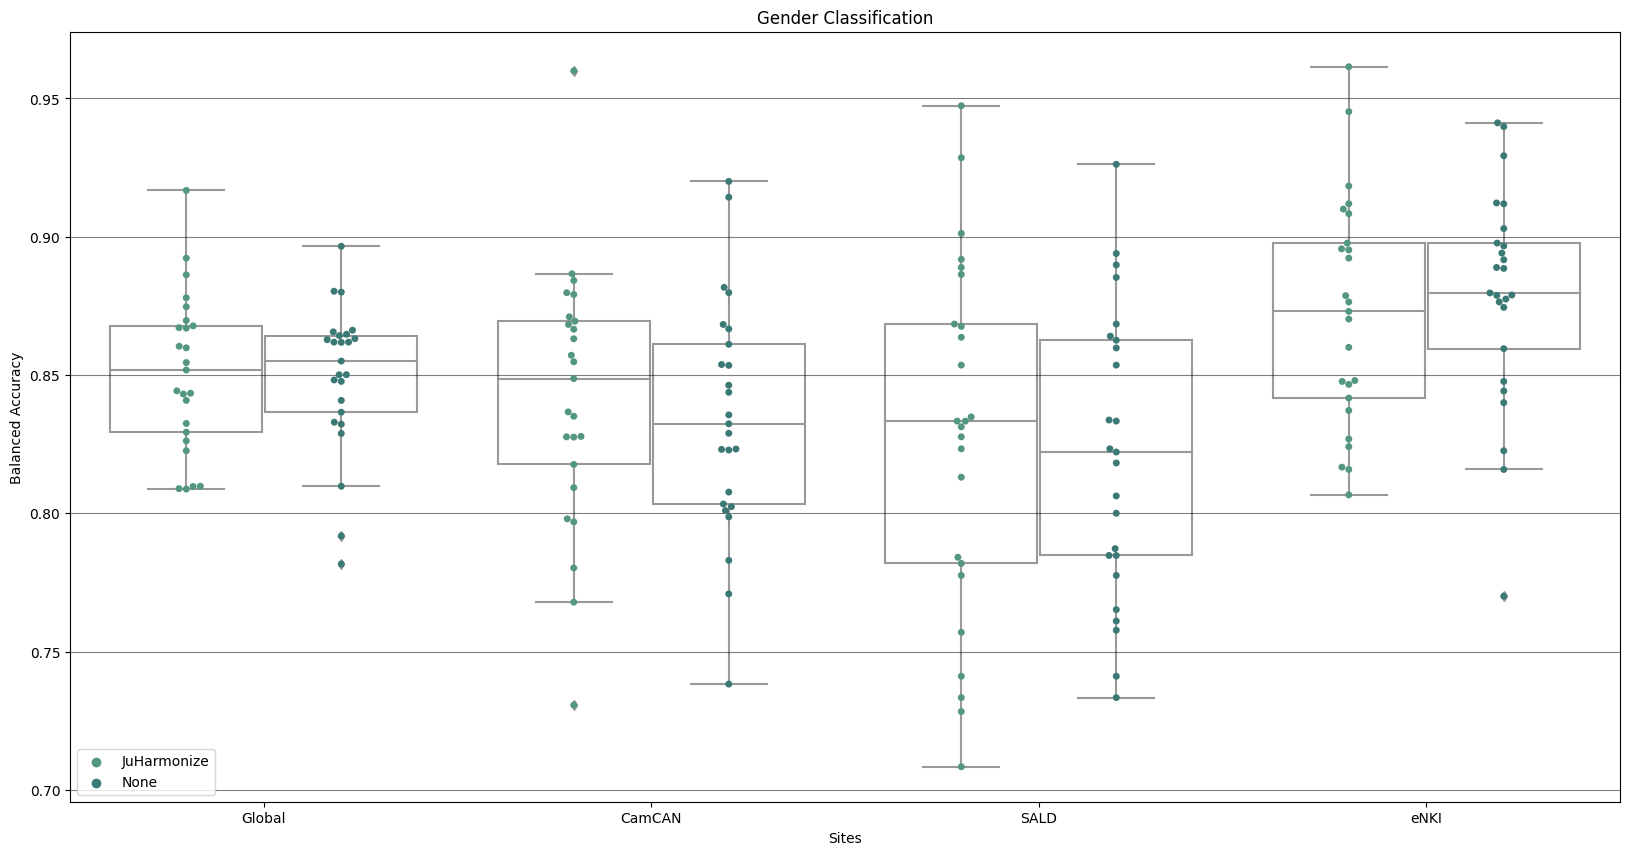

In [2]:
exp_dir = "/home/nnieto/Nico/Harmonization/results_classification/"
experiments_to_check = {
    'test_classification_balanced_data_logit_stack_gssvm_pred_5repetitions'
}

# Get results
data = extract_experiment_data(exp_dir, experiments_to_check, False)
data["Harmonization Schemes"].replace({"pretend": "JuHarmonize",
                                       "target": "Leakage",
                                       "none": "None",
                                       "cheat": "Cheat"},
                                      inplace=True)
data = get_fold_acc_auc(data)
# Change to appropiated names


# Select methods to plot
harm_modes = ["JuHarmonize", "None"]
data = data[data["Harmonization Schemes"].isin(harm_modes)]

# Plot
metric_to_plot = "Balanced Accuracy"
pal = sbn.cubehelix_palette(4, rot=-.5, light=0.5, dark=0.2)
_, ax = plt.subplots(1, 1, figsize=[20, 10])
sbn.swarmplot(
    data=data,
    x="site", y=metric_to_plot, hue="Harmonization Schemes",
    palette=pal,
    hue_order=harm_modes, dodge=True, ax=ax
)
sbn.boxplot(
    data=data, color="w", zorder=1,
    x="site", y=metric_to_plot, hue="Harmonization Schemes",
    hue_order=harm_modes, dodge=True, ax=ax, palette=["w"]*len(harm_modes)
)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:len(harm_modes)], labels[:len(harm_modes)],
          loc='lower left')
plt.ylabel(metric_to_plot)
plt.xlabel("Sites")
plt.title("Gender Classification")
plt.grid(alpha=0.5, axis="y", c="black")
plt.show()


# DATASETS: Kersten Data. PRED: GSSCM, STACK: Logit.
# Two big sites

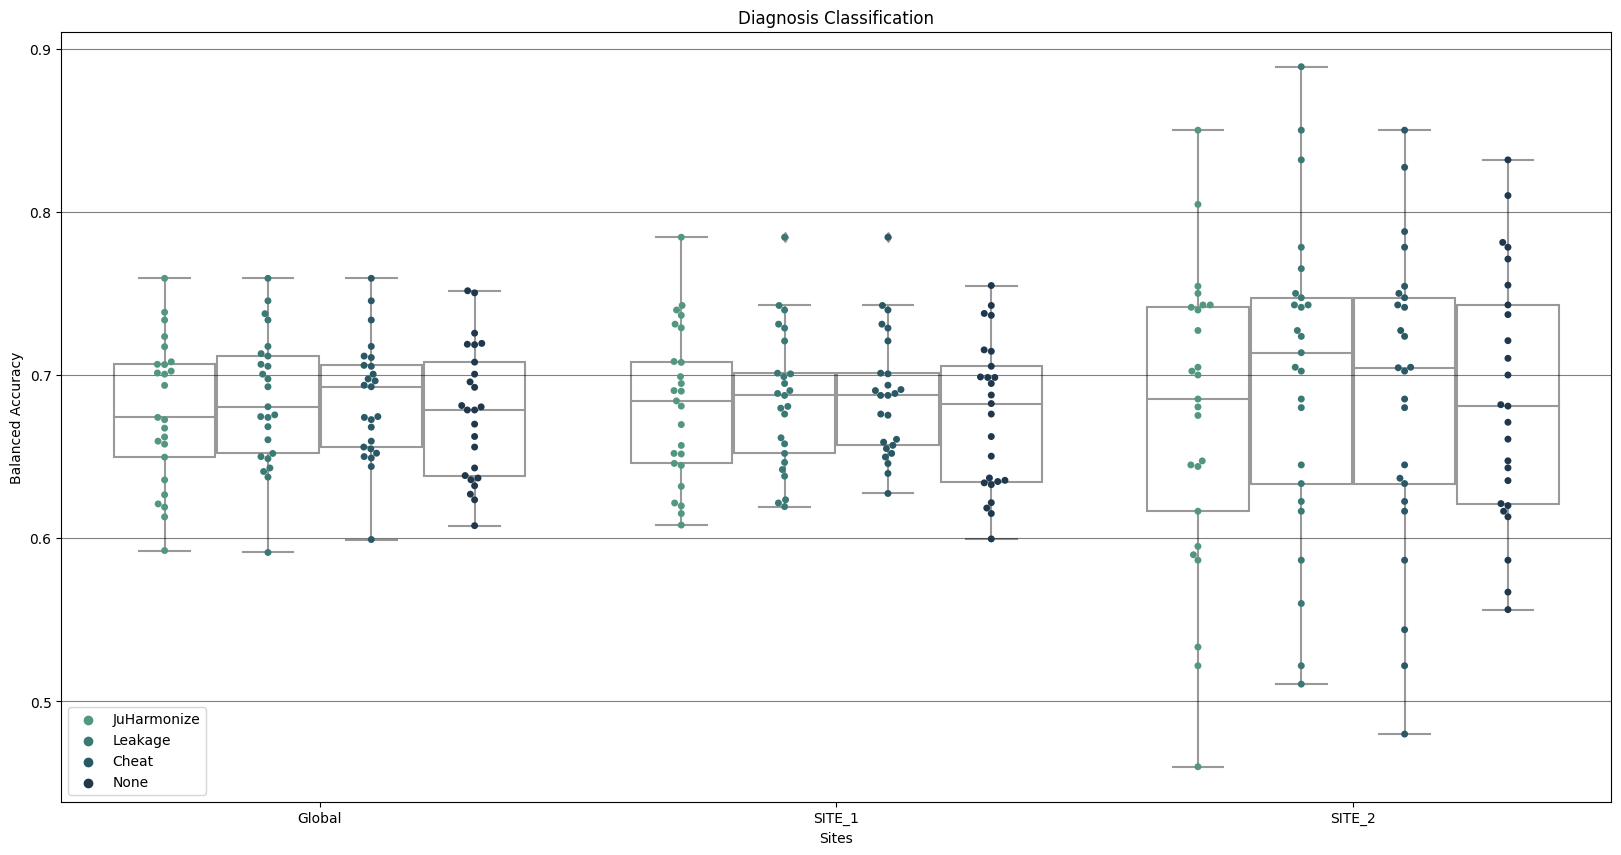

In [3]:
exp_dir = "/home/nnieto/Nico/Harmonization/results_classification/"
experiments_to_check = {
    'test_classification_Kersten_data_logit_stack_gssvm_pred_5repetitions'
}
# Get results
data = extract_experiment_data(exp_dir, experiments_to_check, False)
data.rename(columns={"harmonize_mode": "Harmonization Schemes"},
            inplace=True)
data = get_fold_acc_auc(data)
# Change to appropiated names
data["Harmonization Schemes"].replace({"pretend": "JuHarmonize",
                                       "target": "Leakage",
                                       "none": "None",
                                       "cheat": "Cheat",
                                       "predict": "NeuroHarmony"},
                                      inplace=True)

# Select methods to plot
harm_modes = ["JuHarmonize", "Leakage", "Cheat", "None"]
data = data[data["Harmonization Schemes"].isin(harm_modes)]
site_order = ["Global", "SITE_1", "SITE_2"]
metric_to_plot = "Balanced Accuracy"

# Plot
pal = sbn.cubehelix_palette(4, rot=-.5, light=0.5, dark=0.2)
_, ax = plt.subplots(1, 1, figsize=[20, 10])
sbn.swarmplot(
    data=data,
    x="site", y=metric_to_plot, hue="Harmonization Schemes",
    order=site_order, palette=pal,
    hue_order=harm_modes, dodge=True, ax=ax
)
sbn.boxplot(
    data=data, color="w", zorder=1,
    x="site", y=metric_to_plot, hue="Harmonization Schemes",
    order=site_order,
    hue_order=harm_modes, dodge=True, ax=ax, palette=["w"]*len(harm_modes)
)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:len(harm_modes)], labels[:len(harm_modes)],
          loc='lower left')
plt.ylabel(metric_to_plot)
plt.xlabel("Sites")
plt.title("Diagnosis Classification")
plt.grid(alpha=0.5, axis="y", c="black")
plt.show()

# SAME DATA AND MODELS
# USING SITES WITH AT LEAST 30 IMAGES

/home/nnieto/Nico/Harmonization/Harmonization/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2006: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/home/nnieto/Nico/Harmonization/Harmonization/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2006: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/home/nnieto/Nico/Harmonization/Harmonization/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2006: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/home/nnieto/Nico/Harmonization/Harmonization/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2006: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/home/nnieto/Nico/Harmonization/Harmonization/lib/python3.9/site-packages/sklearn/metrics/_classification.py

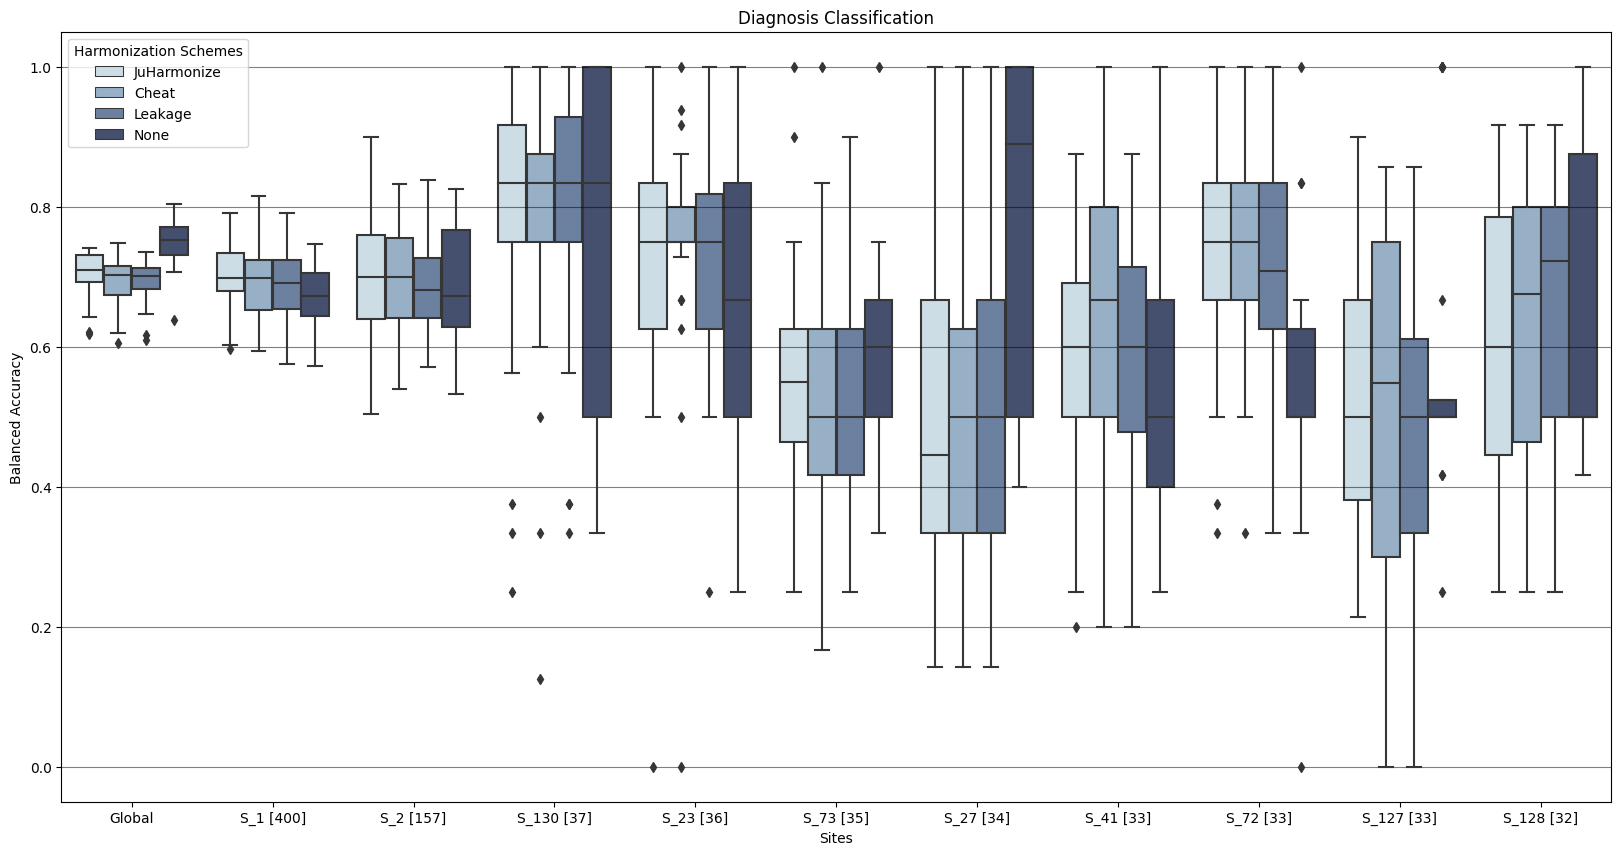

In [5]:
exp_dir = "/home/nnieto/Nico/Harmonization/results_classification/"
experiments_to_check = {
 'test_classification_Kersten_data_min30_logit_stack_gssvm_pred_5repetitions'
}
# Get results
data = extract_experiment_data(exp_dir, experiments_to_check, False)
data.rename(columns={"harmonize_mode": "Harmonization Schemes"},
            inplace=True)
data = get_fold_acc_auc(data)

data.rename(columns={"harmonize_mode": "Harmonization Schemes"},
            inplace=True)
data["Harmonization Schemes"].replace({"pretend": "JuHarmonize",
                                       "target": "Leakage",
                                       "none": "None",
                                       "cheat": "Cheat"}, inplace=True)

harm_modes = ["JuHarmonize", "Cheat", "Leakage", "None"]
# Select methods to plot
data = data[data["Harmonization Schemes"].isin(harm_modes)]

pal = sbn.cubehelix_palette(4, rot=-.15, light=0.85, dark=0.3)
_, ax = plt.subplots(1, 1, figsize=[20, 10])
metric_to_plot = "Balanced Accuracy"

sbn.boxplot(
    data=data, color="w",
    x="site", y=metric_to_plot, hue="Harmonization Schemes",
    hue_order=harm_modes, dodge=True, ax=ax, palette=pal
)

plt.ylabel(metric_to_plot)
plt.xlabel("Sites")
plt.title("Diagnosis Classification")
plt.grid(alpha=0.5, axis="y", c="black")

site_list = ["Global",
             "S_1 [400]",
             "S_2 [157]",
             "S_130 [37]",
             "S_23 [36]",
             "S_73 [35]",
             "S_27 [34]",
             "S_41 [33]",
             "S_72 [33]",
             "S_127 [33]",
             "S_128 [32]",
             ]
ax.set_xticklabels(site_list)
plt.show()

# Imbalanced Genders classification: eNKI and CamCAN. stack LOGIT pred GSSVM

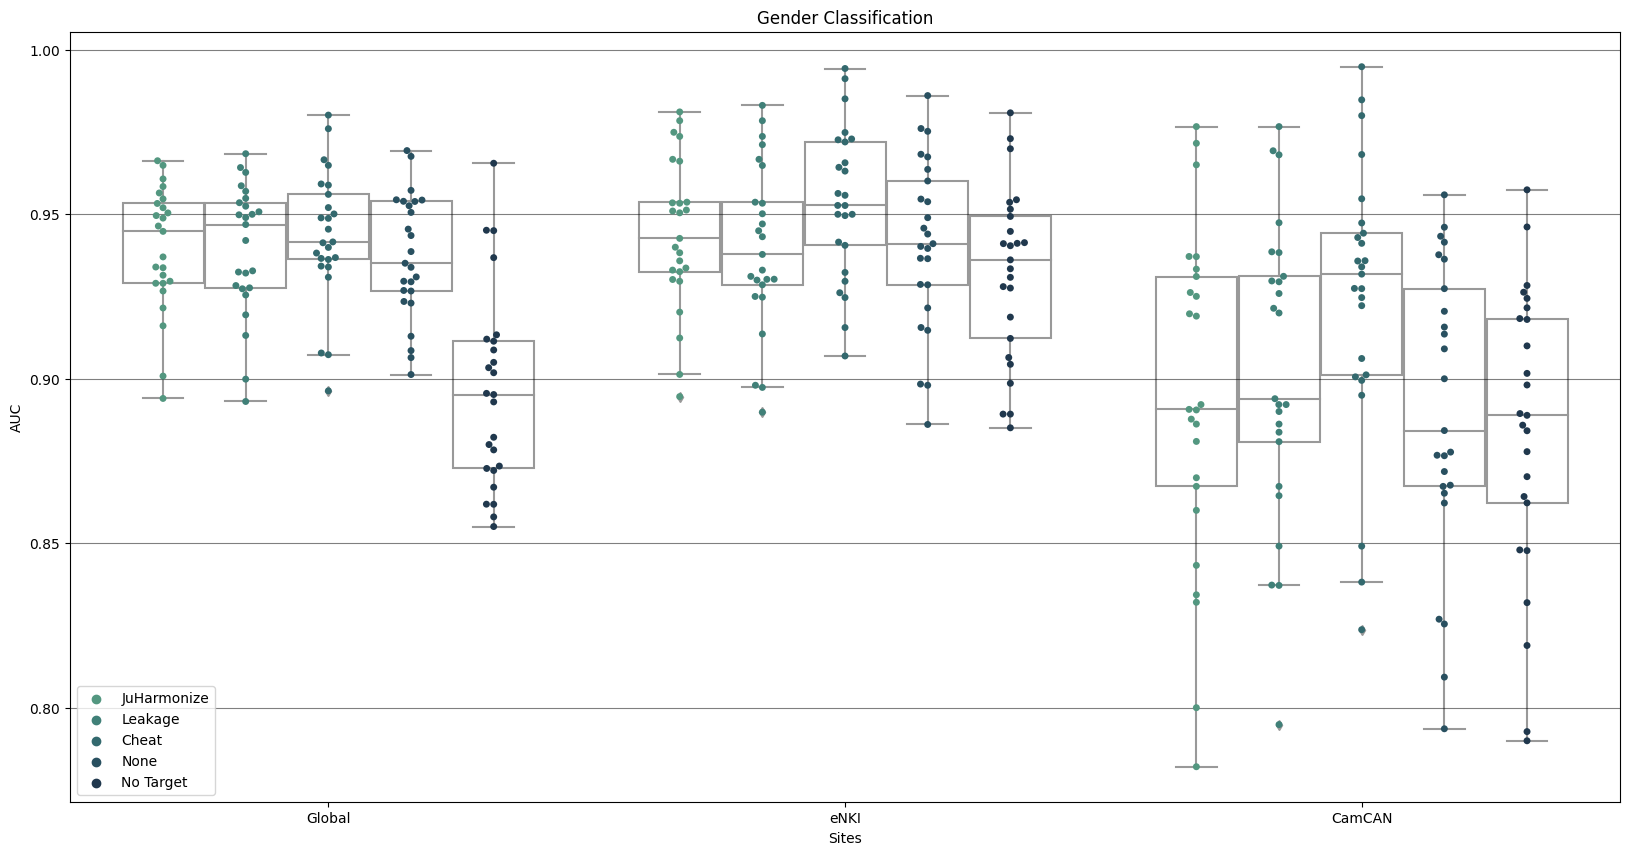

In [40]:
exp_dir = "/home/nnieto/Nico/Harmonization/results_classification/"
experiments_to_check = {
    'test_classification_separated_genders_logit_stack_gssvm_pred_5repetitions'
}
# Get results
data = extract_experiment_data(exp_dir, experiments_to_check, False)
data.rename(columns={"harmonize_mode": "Harmonization Schemes"},
            inplace=True)
data = get_fold_acc_auc(data)
# Change to appropiated names
data["Harmonization Schemes"].replace({"pretend": "JuHarmonize",
                                       "target": "Leakage",
                                       "none": "None",
                                       "cheat": "Cheat",
                                       "predict": "NeuroHarmony",
                                       "notarget": "No Target"},
                                      inplace=True)

# Select methods to plot
harm_modes = ["JuHarmonize", "Leakage", "Cheat", "None", "No Target"]
data = data[data["Harmonization Schemes"].isin(harm_modes)]
site_order = ["Global", "eNKI", "CamCAN"]
metric_to_plot = "AUC"

# Plot
pal = sbn.cubehelix_palette(5, rot=-.5, light=0.5, dark=0.2)
_, ax = plt.subplots(1, 1, figsize=[20, 10])
sbn.swarmplot(
    data=data,
    x="site", y=metric_to_plot, hue="Harmonization Schemes",
    order=site_order, palette=pal,
    hue_order=harm_modes, dodge=True, ax=ax
)
sbn.boxplot(
    data=data, color="w", zorder=1,
    x="site", y=metric_to_plot, hue="Harmonization Schemes",
    order=site_order,
    hue_order=harm_modes, dodge=True, ax=ax, palette=["w"]*len(harm_modes)
)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:len(harm_modes)], labels[:len(harm_modes)],
          loc='lower left')
plt.ylabel(metric_to_plot)
plt.xlabel("Sites")
plt.title("Gender Classification")
plt.grid(alpha=0.5, axis="y", c="black")
plt.show()

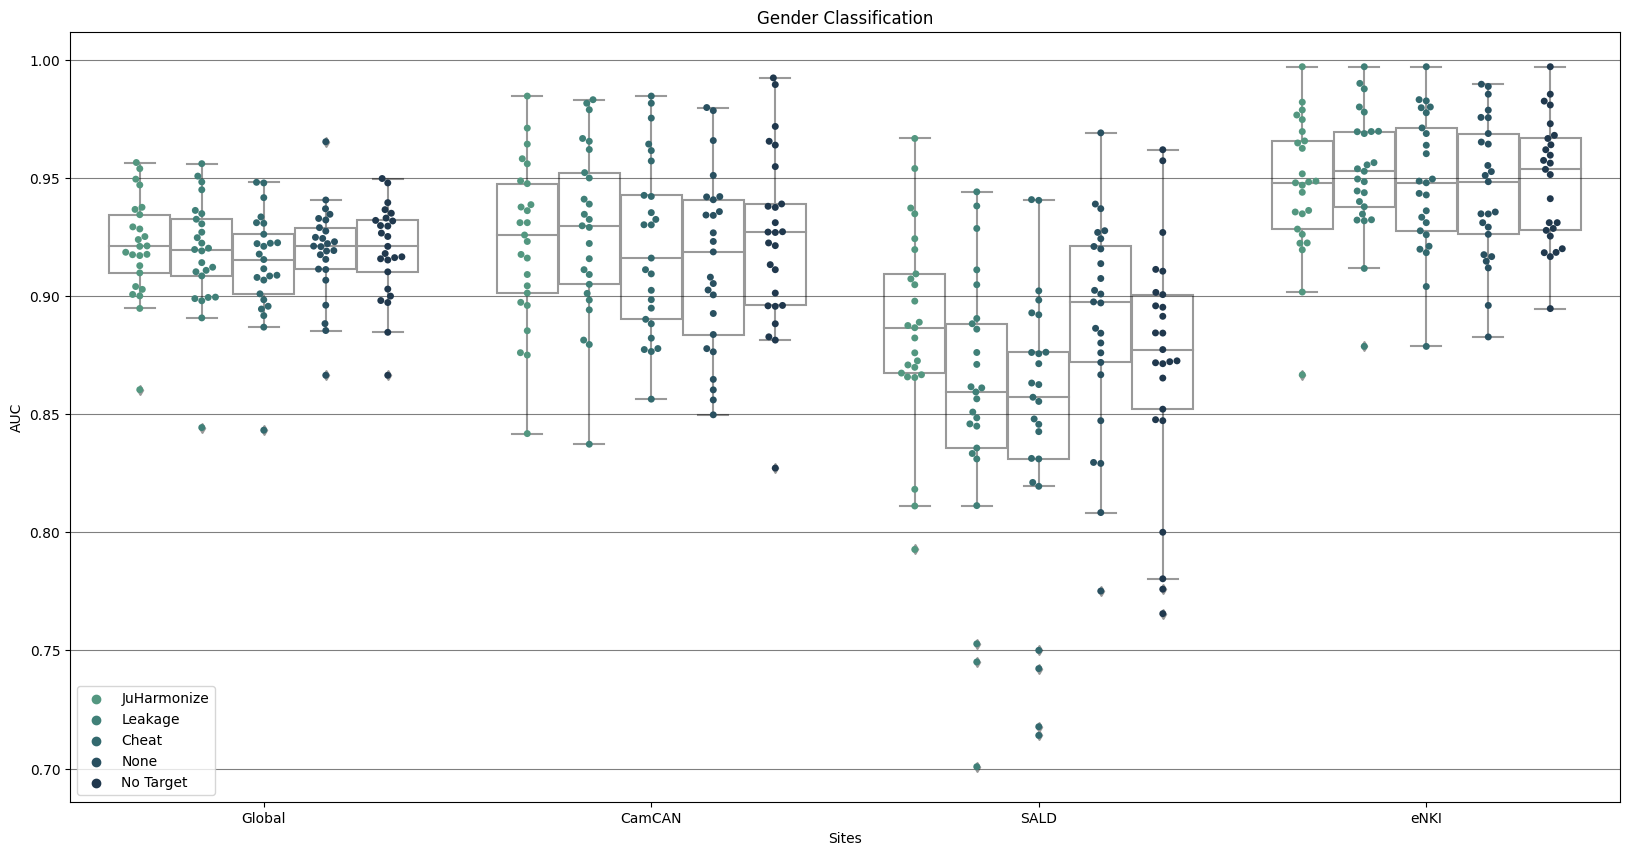

In [38]:
exp_dir = "/home/nnieto/Nico/Harmonization/results_classification/"
experiments_to_check = {
    'test_classification_balanced_data_logit_stack_gssvm_pred_5repetitions'
}
# Get results
data = extract_experiment_data(exp_dir, experiments_to_check, False)
data.rename(columns={"harmonize_mode": "Harmonization Schemes"},
            inplace=True)
data = get_fold_acc_auc(data)
# Change to appropiated names
data["Harmonization Schemes"].replace({"pretend": "JuHarmonize",
                                       "target": "Leakage",
                                       "none": "None",
                                       "cheat": "Cheat",
                                       "predict": "NeuroHarmony",
                                       "notarget": "No Target"},
                                      inplace=True)

# Select methods to plot
harm_modes = ["JuHarmonize", "Leakage", "Cheat", "None", "No Target"]
data = data[data["Harmonization Schemes"].isin(harm_modes)]
# site_order = ["Global", "eNKI", "CamCAN"]
metric_to_plot = "AUC"

# Plot
pal = sbn.cubehelix_palette(5, rot=-.5, light=0.5, dark=0.2)
_, ax = plt.subplots(1, 1, figsize=[20, 10])
sbn.swarmplot(
    data=data,
    x="site", y=metric_to_plot, hue="Harmonization Schemes",
    # order=site_order,
    palette=pal,
    hue_order=harm_modes, dodge=True, ax=ax
)
sbn.boxplot(
    data=data, color="w", zorder=1,
    x="site", y=metric_to_plot, hue="Harmonization Schemes",
    # order=site_order,
    hue_order=harm_modes, dodge=True, ax=ax, palette=["w"]*len(harm_modes)
)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:len(harm_modes)], labels[:len(harm_modes)],
          loc='lower left')
plt.ylabel(metric_to_plot)
plt.xlabel("Sites")
plt.title("Gender Classification")
plt.grid(alpha=0.5, axis="y", c="black")
plt.show()

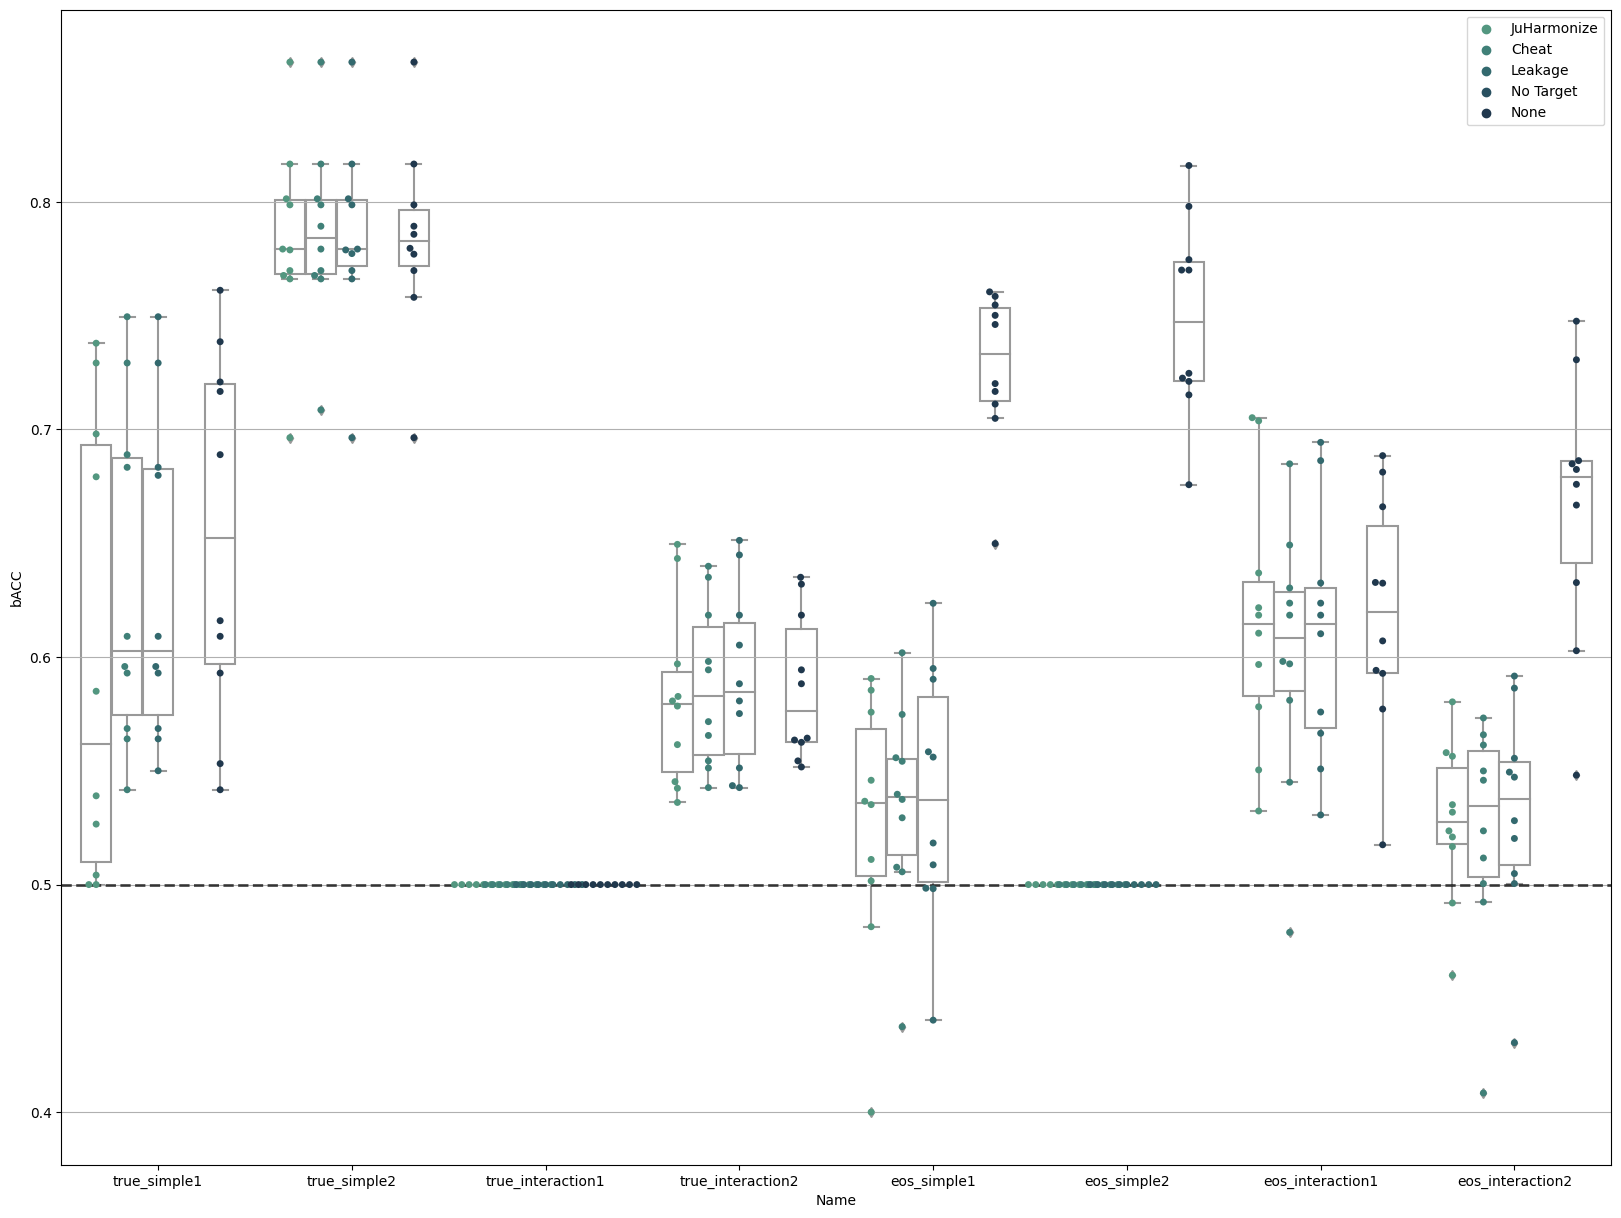

In [27]:
import pandas as pd
results = pd.read_csv("/home/nnieto/Nico/Harmonization/results_classification/MAREoS/results_LASSO_MAREoS_complete.csv")         # noqa
fig, ax = plt.subplots(1, 1, figsize=[20, 15])

harm_methods = ["JuHarmonize", "Cheat", "Leakage", "No Target", "None"]
pal = sbn.cubehelix_palette(len(harm_methods), rot=-.5, light=0.5, dark=0.2)

sbn.swarmplot(
    data=results,
    x="Name", y="bACC", hue="Method",
    hue_order=harm_methods,
    dodge=True, ax=ax,
    palette=pal
)

sbn.boxplot(
    data=results, color="w", zorder=1,
    x="Name", y="bACC", hue="Method",
    hue_order=harm_methods,
    dodge=True, ax=ax, palette=["w"]*len(harm_methods)
)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:len(harm_methods)], labels[:len(harm_methods)])
ax.axhline(0.5, lw=2, color="k",
           ls="--", alpha=0.7, label="Chance level")
plt.grid(axis="y")
plt.show()

In [ ]:
results

# Check mareos

In [23]:
data1 = pd.read_csv("/home/nnieto/Nico/Harmonization/data/MAREoS/public_datasets/eos_simple1_data.csv")
y= pd.read_csv("/home/nnieto/Nico/Harmonization/data/MAREoS/public_datasets/eos_simple1_response.csv")

In [24]:
data = pd.merge(left=data1, right=y
                )
data.shape

(1001, 20)

/tmp/ipykernel_41016/2450233534.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Harmonization Schemes"].replace({"JuHarmonize Test": "JuHarmonize",


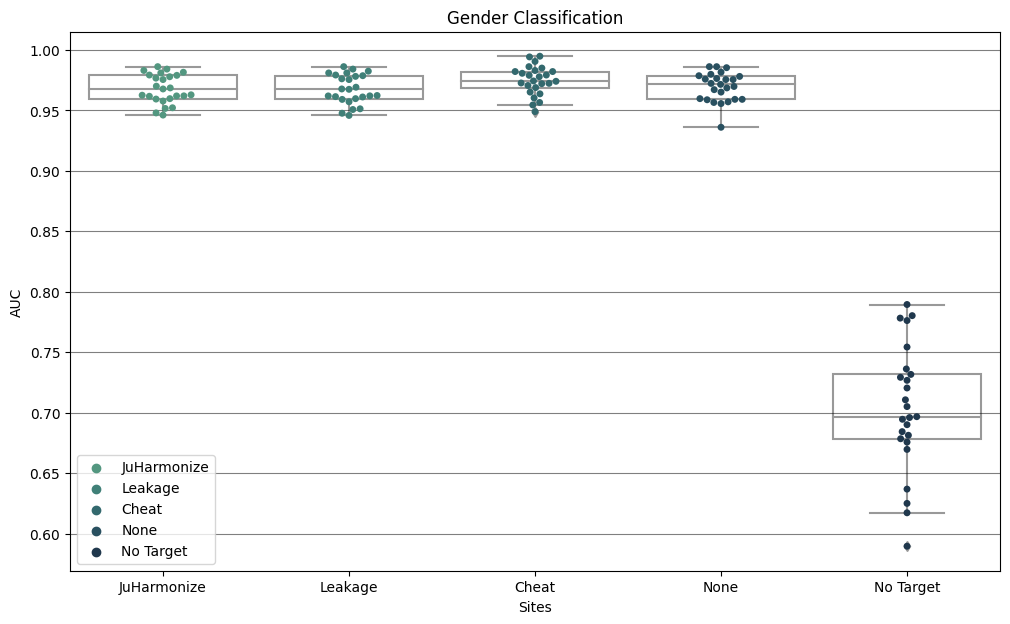

In [43]:
import pandas as pd
results = pd.read_csv("/home/nnieto/Nico/Harmonization/results_classification/test_imbalanced_genders_lg_pred_lg_stack/results_all_methods.csv")

results.rename(columns={"Model": "Harmonization Schemes"},
            inplace=True)
harm_methods = ["JuHarmonize Test", "Cheat Test", "Leakage Test", "No Target Test", "None Test"]

data = results[results["Harmonization Schemes"].isin(harm_methods)]

# Change to appropiated names
data["Harmonization Schemes"].replace({"JuHarmonize Test": "JuHarmonize",
                                       "Leakage Test": "Leakage",
                                       "None Test": "None",
                                       "Cheat Test": "Cheat",
                                       "No Target Test": "No Target"},
                                      inplace=True)

# Select methods to plot
harm_modes = ["JuHarmonize", "Leakage", "Cheat", "None", "No Target"]
metric_to_plot = "AUC"

# Plot
pal = sbn.cubehelix_palette(5, rot=-.5, light=0.5, dark=0.2)
_, ax = plt.subplots(1, 1, figsize=[12, 7])
sbn.swarmplot(
    data=data,
    x="Harmonization Schemes", y=metric_to_plot, hue="Harmonization Schemes",
    palette=pal,
    hue_order=harm_modes,
    order=harm_modes, dodge=False, ax=ax
)
sbn.boxplot(
    data=data, color="w", zorder=1,
    x="Harmonization Schemes", y=metric_to_plot, hue="Harmonization Schemes",
    order=harm_modes, dodge=False, ax=ax, palette=["w"]*len(harm_modes)
)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:len(harm_modes)], labels[:len(harm_modes)],
          loc='lower left')
plt.ylabel(metric_to_plot)
plt.xlabel("Sites")
plt.title("Gender Classification")
plt.grid(alpha=0.5, axis="y", c="black")
plt.show()

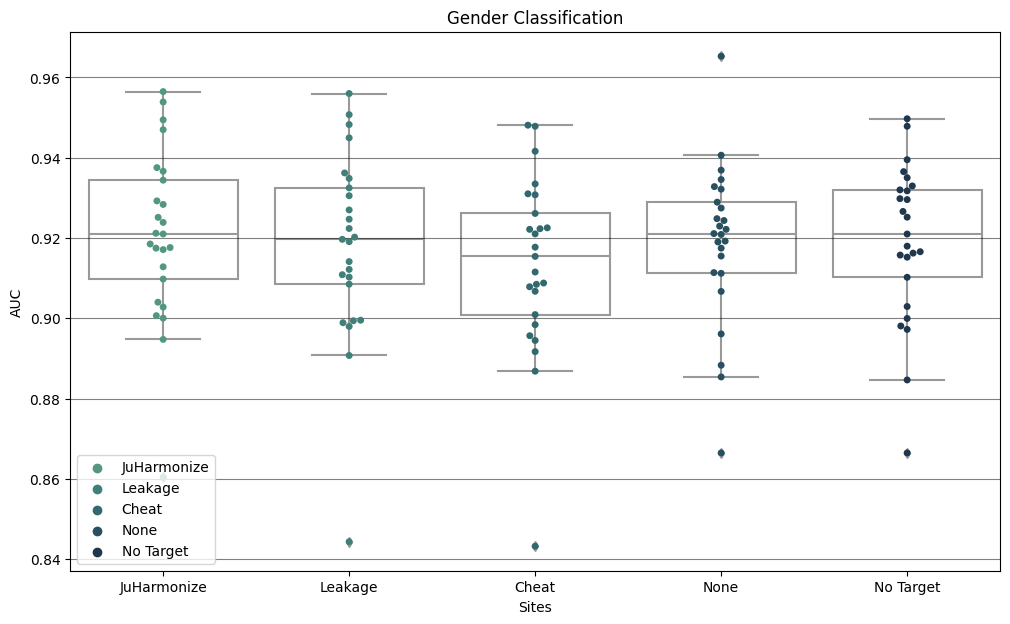

In [48]:
exp_dir = "/home/nnieto/Nico/Harmonization/results_classification/"
experiments_to_check = {
    'test_classification_balanced_data_logit_stack_gssvm_pred_5repetitions'
}
# Get results
data = extract_experiment_data(exp_dir, experiments_to_check, False)
data.rename(columns={"harmonize_mode": "Harmonization Schemes"},
            inplace=True)
data = get_fold_acc_auc(data)
# Change to appropiated names
data["Harmonization Schemes"].replace({"pretend": "JuHarmonize",
                                       "target": "Leakage",
                                       "none": "None",
                                       "cheat": "Cheat",
                                       "predict": "NeuroHarmony",
                                       "notarget": "No Target"},
                                      inplace=True)

# Select methods to plot
harm_modes = ["JuHarmonize", "Leakage", "Cheat", "None", "No Target"]
data = data[data["Harmonization Schemes"].isin(harm_modes)]
data = data[data["site"].isin(["Global"])]

# site_order = ["Global", "eNKI", "CamCAN"]
metric_to_plot = "AUC"

# Plot
pal = sbn.cubehelix_palette(5, rot=-.5, light=0.5, dark=0.2)
_, ax = plt.subplots(1, 1, figsize=[12, 7])
sbn.swarmplot(
    data=data,
    x="Harmonization Schemes", y=metric_to_plot, hue="Harmonization Schemes",
    palette=pal,
    order=harm_modes,
    hue_order=harm_modes, dodge=False, ax=ax
)
sbn.boxplot(
    data=data, color="w", zorder=1,
    x="Harmonization Schemes", y=metric_to_plot, hue="Harmonization Schemes",
    order=harm_modes,
    hue_order=harm_modes, dodge=False, ax=ax, palette=["w"]*len(harm_modes)
)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:len(harm_modes)], labels[:len(harm_modes)],
          loc='lower left')
plt.ylabel(metric_to_plot)
plt.xlabel("Sites")
plt.title("Gender Classification")
plt.grid(alpha=0.5, axis="y", c="black")
plt.show()